# Generalized Linear Model

This notebook consists of:

1. Modelling the language of the performances from 1893 to 1963 for Dutch and German

2. Modelling the language of the performances from 1946 to 1963 for Dutch and German

3. Modelling the language of the titles from 1893 to 1963 for Dutch and German

4. Modelling the language of the titles from 1946 to 1963 for Dutch and German

In [1]:
df <- read.delim('GLM_dataset.csv', sep=',', header=TRUE)

In [2]:
install.packages("effects")

library(effects)


The downloaded binary packages are in
	/var/folders/7v/xl0gcbzx4h5dkzt7_jyys40c0000gn/T//RtmphQKqzG/downloaded_packages


Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.3.3”
Warning message in check_dep_version():
“ABI version mismatch: 
lme4 was built with Matrix ABI version 1
Current Matrix ABI version is 0
Please re-install lme4 from source or restore original ‘Matrix’ package”
lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [3]:
# Two new binary columns whether a production is Dutch (True/False) or German (True/False)
df$Dutch <- as.integer(as.logical(df$Dutch))
df$German <- as.integer(as.logical(df$German))

# Two new binary columns whether a title is Dutch (True/False) or German (True/False)
df$Dutch_Title <- as.integer(as.logical(df$Dutch_Title))
df$German_Title <- as.integer(as.logical(df$German_Title))

head(df)

,X,Date,Original.Premiere,Directors,Normalized.Title,Composer,Multiple.Bill,Season,Title.Language,Occasion,Production.Language,Dutch,German,Title_Language_GLM,Dutch_Title,German_Title
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
1,0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,0,1,Dutch,1,0
2,1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,0,1,other,0,0
3,2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,0,1,Dutch,1,0
4,3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,0,1,other,0,0
5,4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,False,1893-1894,Unk,N,Dutch,1,0,other,0,0
6,5,1893-10-17,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,0,1,Dutch,1,0


In [4]:
# Make sure that columns are interpreted as (ordered) factors

df$Season <- factor(df$Season, ordered = TRUE)
df$Date <- as.factor(df$Date)
df$Composer <- as.factor(df$Composer)
df$Normalized.Title <- as.factor(df$Normalized.Title)
df$Original.Premiere <- as.factor(df$Original.Premiere)
df$Multiple.Bill <- as.factor(df$Multiple.Bill) 
df$Occasion <- as.factor(df$Occasion)
df$Dutch <- as.factor(df$Dutch)
df$German <- as.factor(df$German)

df$Dutch_Title <- as.factor(df$Dutch_Title) # Titles in Dutch
df$German_Title <- as.factor(df$German_Title) # Titles in German

df$Production_Language <- as.factor(df$Production.Language) # Column with the language of the work (Dutch/German/other)
df$Title_Language_GLM <- as.factor(df$Title_Language_GLM) # Column with the language of the titles (Dutch/German/other)
df$Directors <- as.factor(df$Directors)
df$Directors <- factor(df$Directors, ordered = TRUE)

In [5]:
# Check if all columns are formatted correctly

str(df)


'data.frame':	10809 obs. of  17 variables:
 $ X                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date               : Factor w/ 4950 levels "","1893-10-03",..: 2 3 4 5 15 6 7 8 9 10 ...
 $ Original.Premiere  : Factor w/ 155 levels "","1608","1733",..: 25 152 25 152 155 25 155 25 155 25 ...
 $ Directors          : Ord.factor w/ 16 levels "August Baeyens"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Normalized.Title   : Factor w/ 658 levels "","'T Minnebrugje",..: 230 642 230 642 61 230 61 230 61 230 ...
 $ Composer           : Factor w/ 334 levels "","?","ALbert Stordiau",..: 54 57 54 57 275 54 275 54 275 54 ...
 $ Multiple.Bill      : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season             : Ord.factor w/ 69 levels "1893-1894"<"1894-1895"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Title.Language     : chr  "NL" "Unk" "NL" "Unk" ...
 $ Occasion           : Factor w/ 2 levels "G","N": 2 2 2 2 2 2 2 2 2 2 ...
 $ Production.Language: chr  "German" "German" "German" "German" ...
 $ Dutch  

## Part 1: Performances 1893-1946

In [6]:
m1 <- glm(Dutch ~ Season + Occasion + Directors + Multiple.Bill + Original.Premiere, data = df, family = binomial)

drop1(m1)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,62211.346,62673.346
Season,59,3977.012,4321.012
Occasion,1,73745.315,74205.315
Directors,6,3735.413,4185.413
Multiple.Bill,1,65166.925,65626.925
Original.Premiere,151,7271.005,7431.005


In [7]:
x = c('1893-1894','1894-1895', '1895-1896', '1896-1897', '1897-1898', 
'1898-1899', '1899-1900', '1900-1901', '1901-1902', '1902-1903', '1903-1904', 
'1904-1905', '1905-1906', '1906-1907', '1907-1908', '1908-1909', '1909-1910', 
'1910-1911', '1911-1912', '1912-1913', '1913-1914', '1914-1915', '1915-1916', '1916-1917', '1917-1918', 
'1918-1919', '1919-1920', '1920-1921', '1921-1922', '1922-1923', '1923-1924', '1924-1925', '1925-1926',
'1926-1927', '1927-1928', '1928-1929', '1929-1930', '1930-1931', '1931-1932', '1932-1933', '1933-1934',
'1934-1935', '1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', 
'1943-1944', '1944-1945', '1945-1946', '1946-1947','1947-1948','1948-1949', '1949-1950', '1950-1951', '1951-1952',
'1952-1953', '1953-1954', '1954-1955', '1955-1956', '1956-1957', '1957-1958', '1958-1959', '1959-1960', '1960-1961',
'1961-1962', '1962-1963', '2099-2100')

break_points <- c('1914-1915', '1915-1916', '1916-1917', '1917-1918')

In [8]:
# New model containing only the relevant predictors

model_NL <- glm(Dutch ~ Multiple.Bill + Season, data = df, family = binomial)

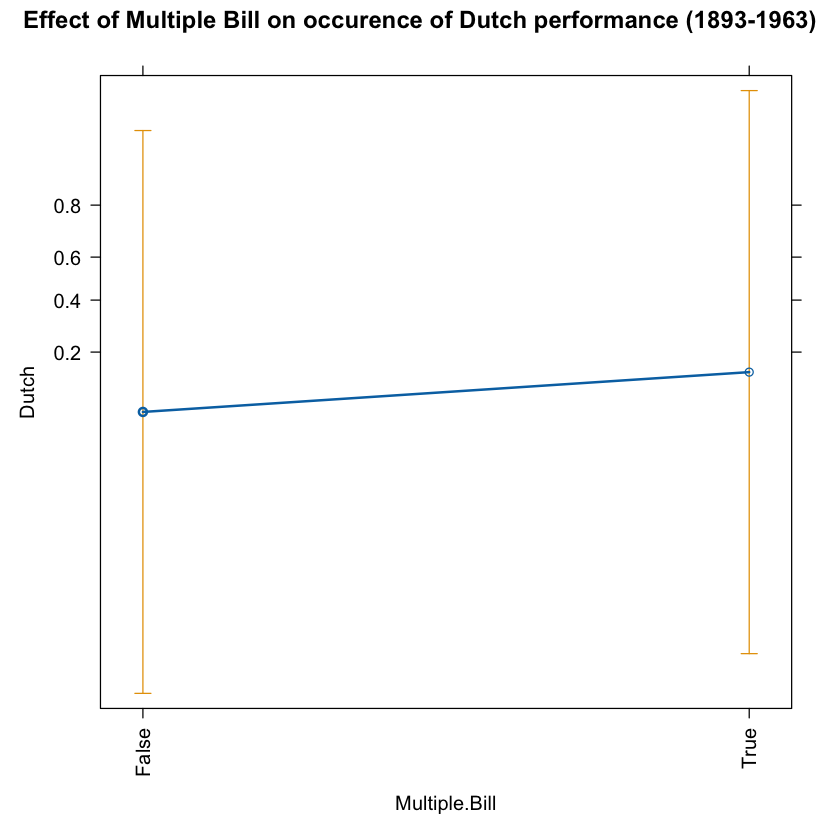

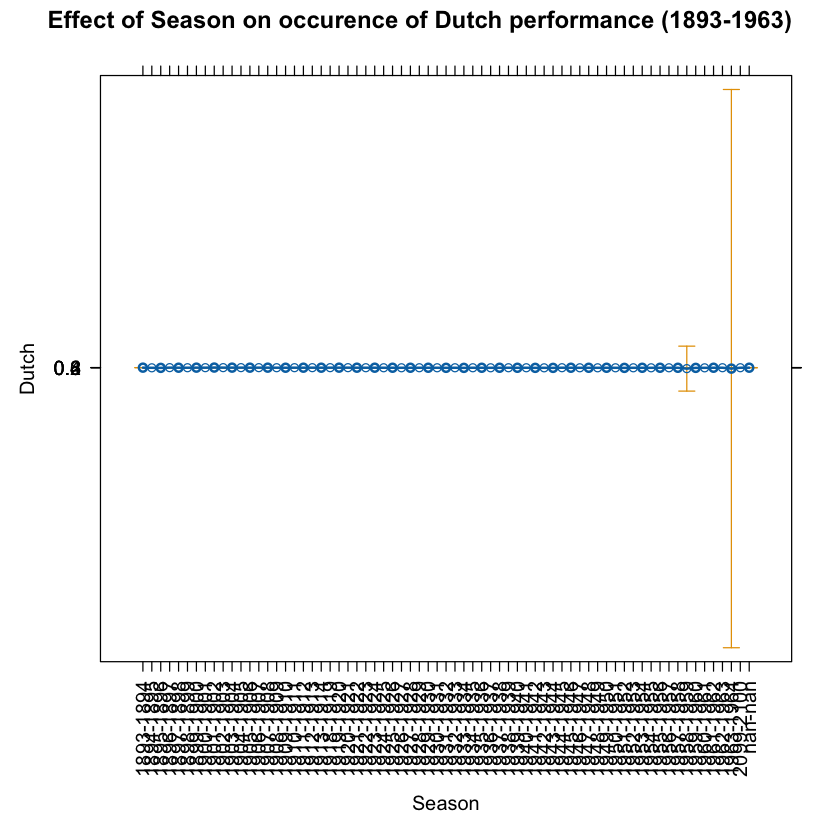

In [9]:
# Plots: effect of Multiple Bill and Season on the occurence of Dutch performances 1893-1963

plot(effect("Multiple.Bill", model_NL), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of Dutch performance (1893-1963)')

plot(effect("Season", model_NL),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of Dutch performance (1893-1963)')

In [10]:
# The same for German

m2 <- glm(German ~ Season + Occasion + Multiple.Bill + Directors + Original.Premiere, data = df, family = binomial)
drop1(m2)

# The model

model_GER <- glm(German ~ Season + Multiple.Bill, data = df, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,7267.599,7729.599
Season,59,7623.317,7967.317
Occasion,1,7276.786,7736.786
Multiple.Bill,1,7819.824,8279.824
Directors,6,7270.906,7720.906
Original.Premiere,154,350416.398,350570.398


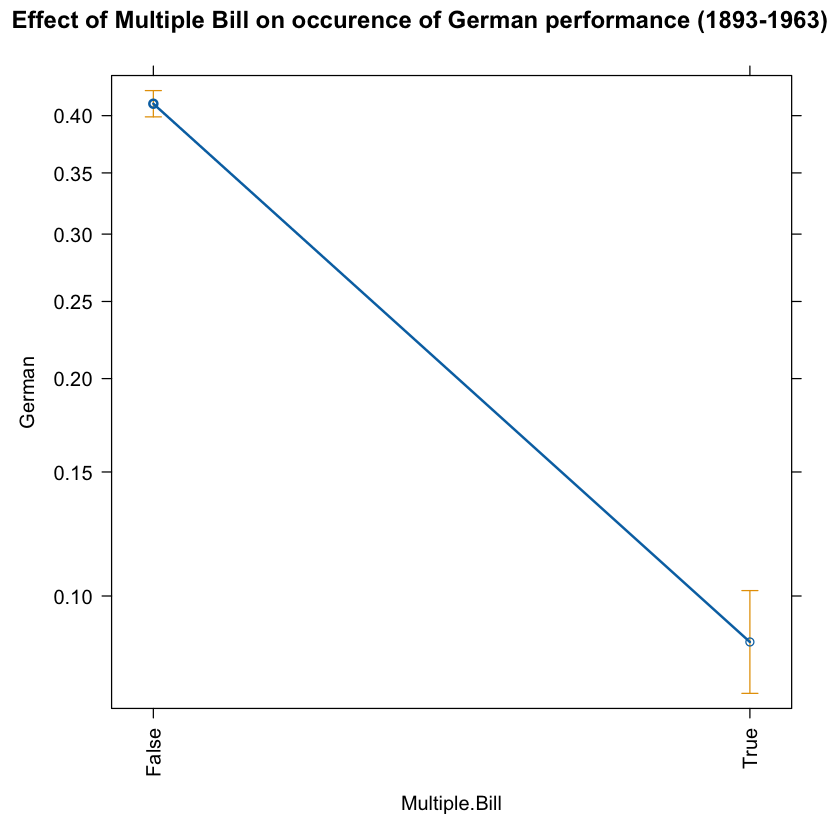

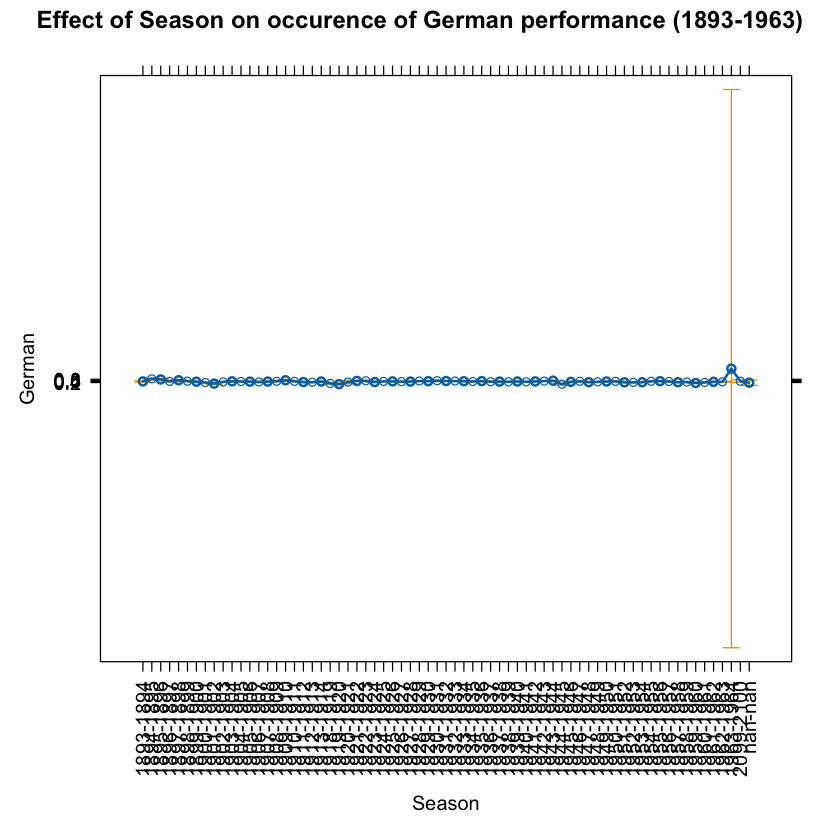

In [11]:
# Plots: effect of Multiple Bill and Season on the occurence of German performances 1893-1963

plot(effect("Multiple.Bill", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of German performance (1893-1963)')

plot(effect("Season", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performance (1893-1963)')

## Part 2: Peformances 1946-1963

In [12]:
# Select the Seasons 1946-1947 to 1962-1963

df_subset <- df[df$Season >= "1946-1947" & df$Season <= "1962-1963", ]

In [13]:
m1sub <- glm(Dutch ~ Season + Occasion + Directors + Multiple.Bill + Original.Premiere, data = df_subset, family = binomial)

drop1(m1sub)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,1590.481,1794.481
Season,12,1630.212,1810.212
Occasion,1,1591.964,1793.964
Directors,0,1590.481,1794.481
Multiple.Bill,1,1590.484,1792.484
Original.Premiere,83,2056.255,2094.255


In [14]:
x = c('1946-1947','1947-1948','1948-1949', '1949-1950', '1950-1951', '1951-1952',
'1952-1953', '1953-1954', '1954-1955', '1955-1956', '1956-1957', '1957-1958', '1958-1959', '1959-1960', '1960-1961',
'1961-1962', '1962-1963', '2099-2100')

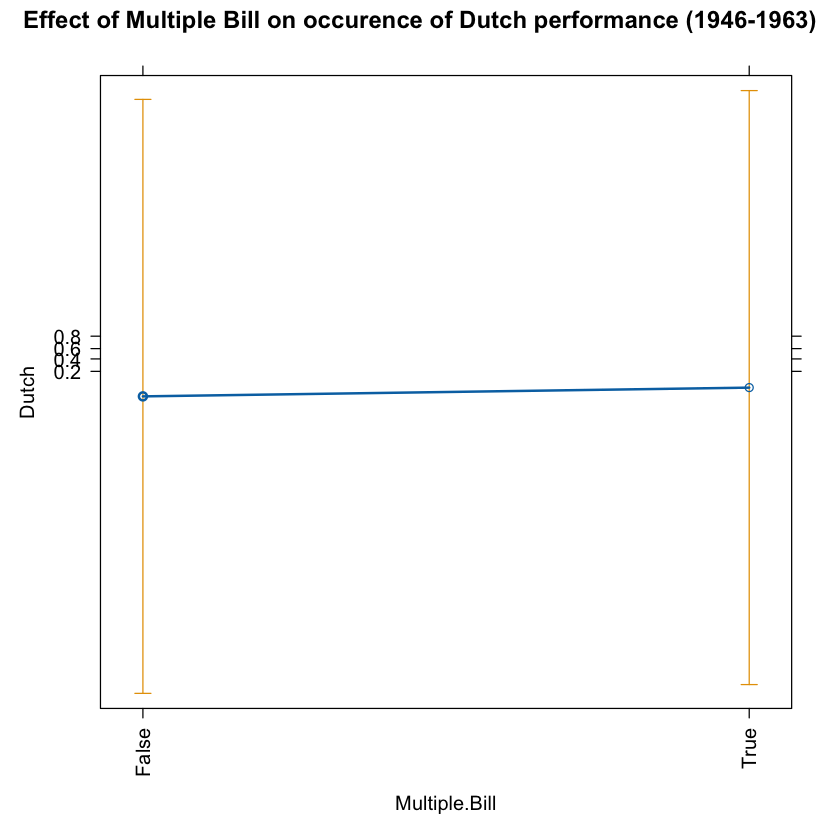

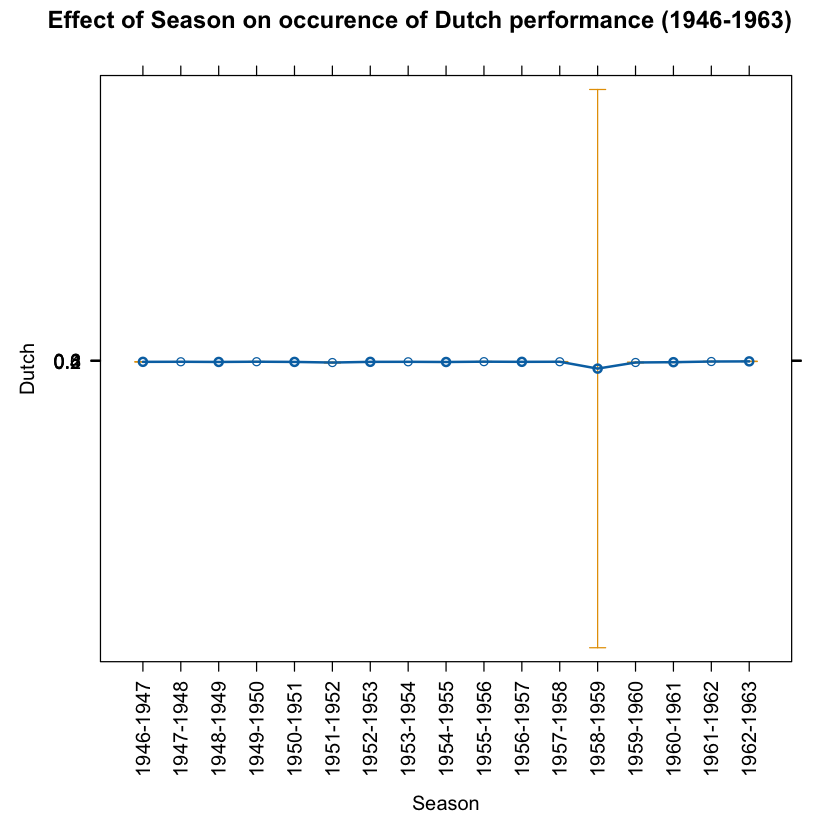

In [15]:
# New model containing only the relevant predictors

model_NL <- glm(Dutch ~ Multiple.Bill + Season, data = df_subset, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of Dutch performances 1946-1963

plot(effect("Multiple.Bill", model_NL), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of Dutch performance (1946-1963)')

plot(effect("Season", model_NL), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of Dutch performance (1946-1963)')

In [16]:
# The same for German

m2sub <- glm(German ~ Season + Occasion + Multiple.Bill + Directors + Original.Premiere, data = df_subset, family = binomial)
drop1(m2sub)

,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,3824.549,4028.549
Season,12,3865.461,4045.461
Occasion,1,3833.423,4035.423
Multiple.Bill,1,4075.418,4277.418
Directors,0,3824.549,4028.549
Original.Premiere,83,4466.577,4504.577


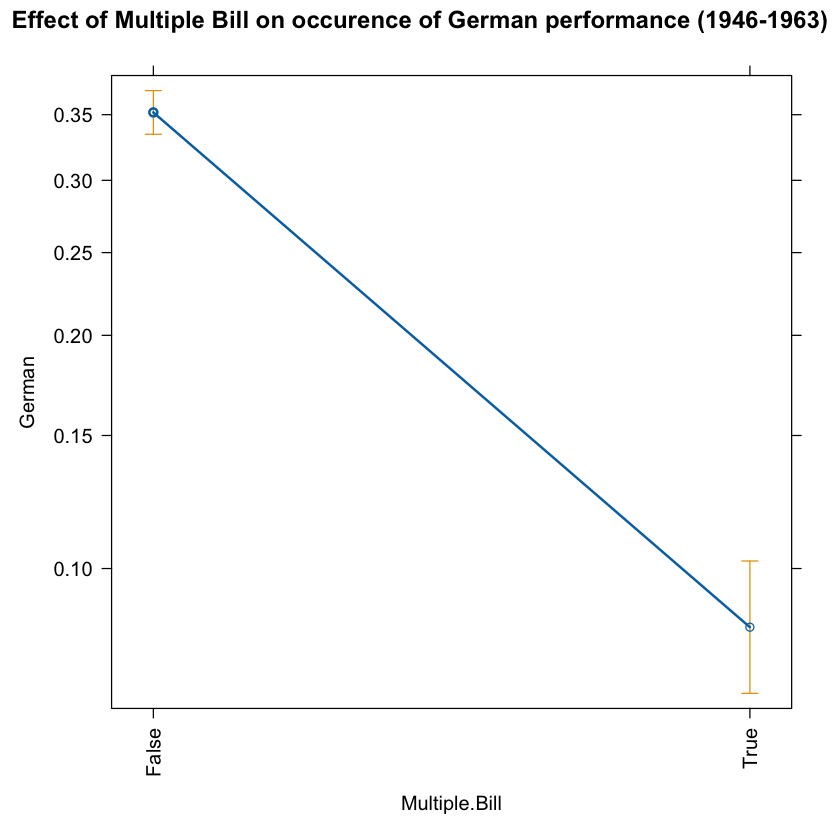

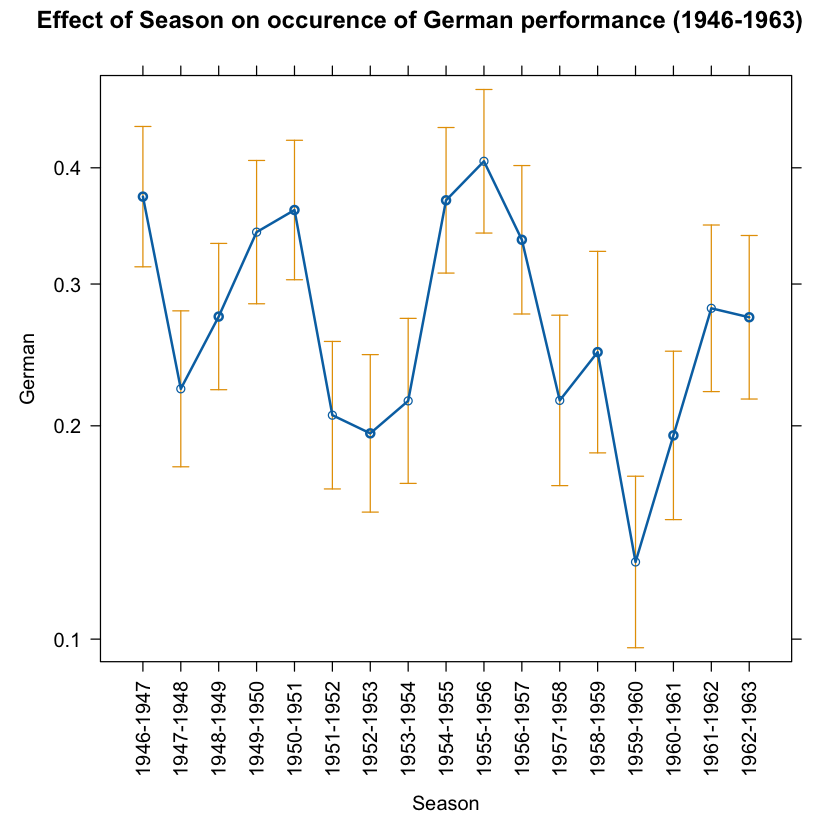

In [17]:
model_GER <- glm(German ~ Season + Multiple.Bill, data = df_subset, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of German performances 1946-1963

plot(effect("Multiple.Bill", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of German performance (1946-1963)')

plot(effect("Season", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performance (1946-1963)')

## Part 3: Title Language 1893-1963

In [18]:
m3 <- glm(Dutch_Title ~ Season + Occasion + Directors + Multiple.Bill + Original.Premiere, data = df, family = binomial)

drop1(m3)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,202565.332,203027.332
Season,59,8369.435,8713.435
Occasion,1,179425.307,179885.307
Directors,6,8163.941,8613.941
Multiple.Bill,1,385018.306,385478.306
Original.Premiere,154,392010.774,392164.774


In [19]:
x = c('1893-1894','1894-1895', '1895-1896', '1896-1897', '1897-1898', 
'1898-1899', '1899-1900', '1900-1901', '1901-1902', '1902-1903', '1903-1904', 
'1904-1905', '1905-1906', '1906-1907', '1907-1908', '1908-1909', '1909-1910', 
'1910-1911', '1911-1912', '1912-1913', '1913-1914', '1914-1915', '1915-1916', '1916-1917', '1917-1918', 
'1918-1919', '1919-1920', '1920-1921', '1921-1922', '1922-1923', '1923-1924', '1924-1925', '1925-1926',
'1926-1927', '1927-1928', '1928-1929', '1929-1930', '1930-1931', '1931-1932', '1932-1933', '1933-1934',
'1934-1935', '1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', 
'1943-1944', '1944-1945', '1945-1946', '1946-1947','1947-1948','1948-1949', '1949-1950', '1950-1951', '1951-1952',
'1952-1953', '1953-1954', '1954-1955', '1955-1956', '1956-1957', '1957-1958', '1958-1959', '1959-1960', '1960-1961',
'1961-1962', '1962-1963', '2099-2100')

break_points <- c('1914-1915', '1915-1916', '1916-1917', '1917-1918')

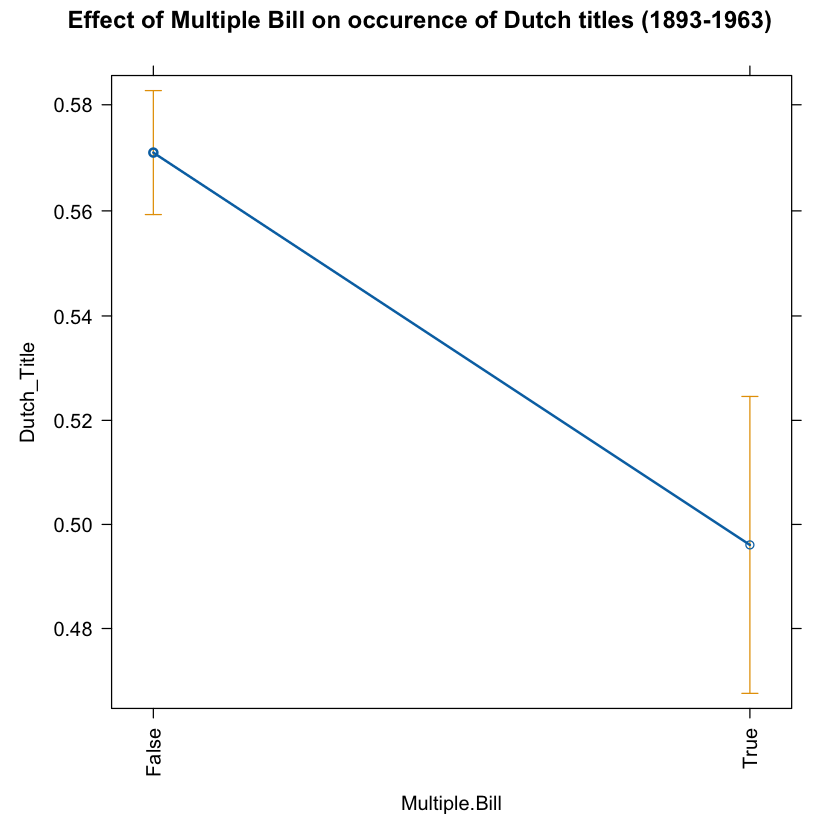

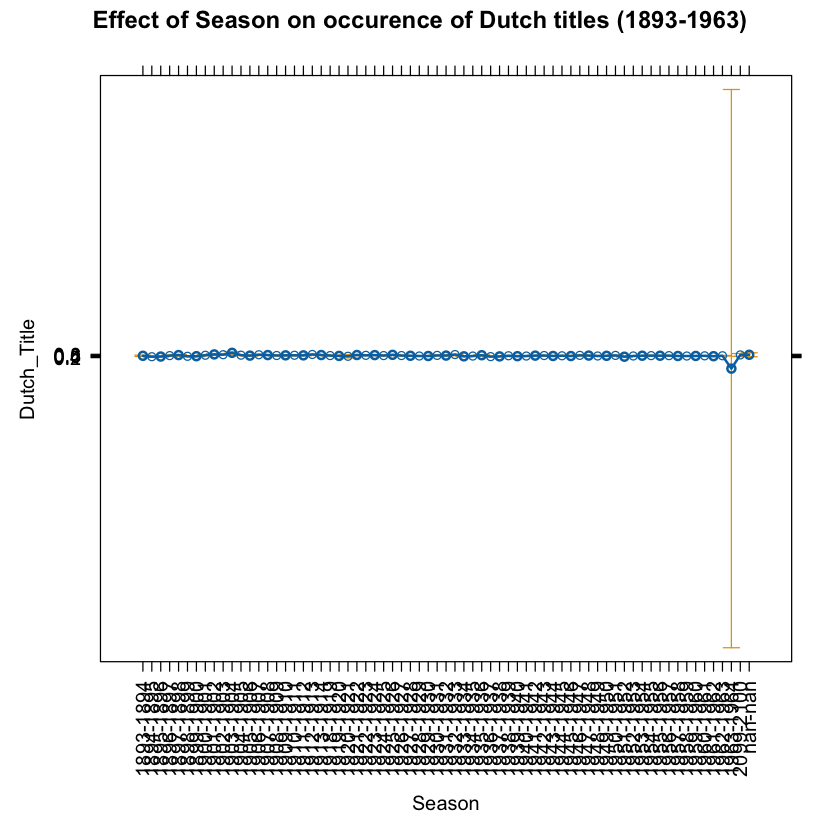

In [20]:
# New model containing only the relevant predictors

model_NL2 <- glm(Dutch_Title ~ Multiple.Bill + Season, data = df, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of Dutch titles 1893-1963

plot(effect("Multiple.Bill", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of Dutch titles (1893-1963)')

plot(effect("Season", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of Dutch titles (1893-1963)')

In [21]:
# The same for German

m4 <- glm(German_Title ~ Season + Occasion + Multiple.Bill + Directors + Original.Premiere, data = df, family = binomial)
drop1(m4)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,36.57655,498.5765
Season,59,91.54716,435.5472
Occasion,0,36.91349,498.9135
Multiple.Bill,0,36.93990,498.9399
Directors,6,36.57655,486.5765
Original.Premiere,154,5550.72262,5704.7226


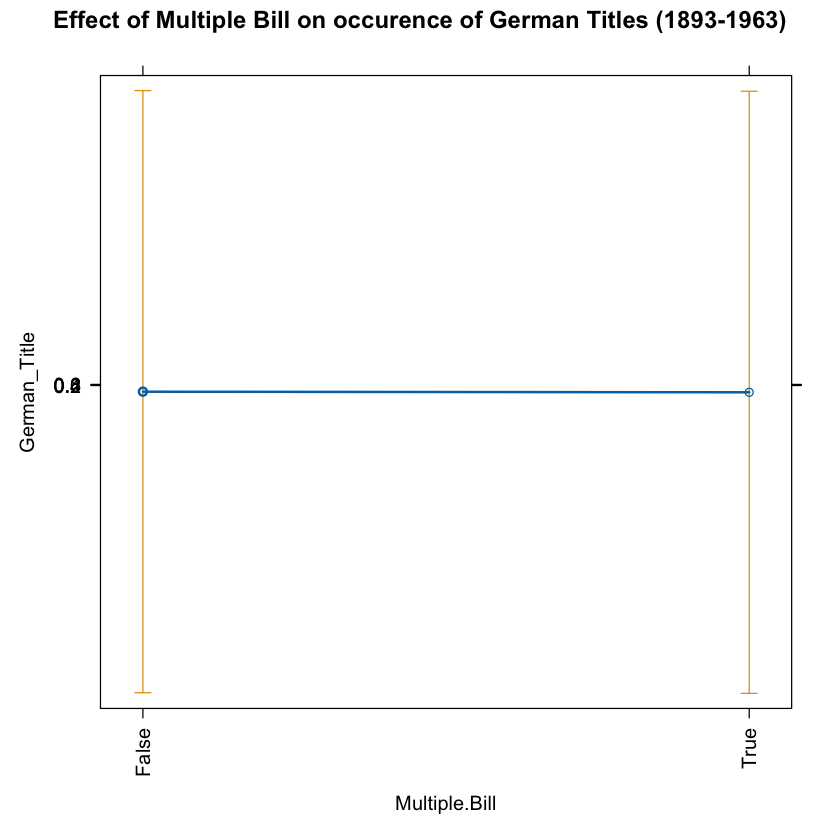

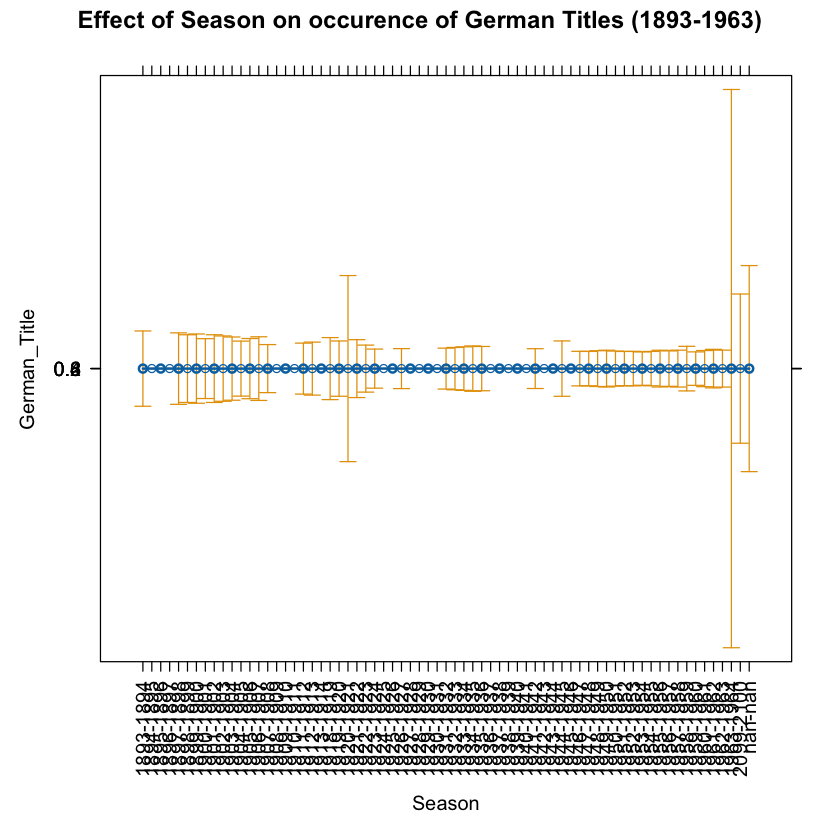

In [22]:
model_GER2 <- glm(German_Title ~ Season + Multiple.Bill, data = df, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of German titles 1893-1963

plot(effect("Multiple.Bill", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of German Titles (1893-1963)')

plot(effect("Season", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German Titles (1893-1963)')

## Part 4: Title Language 1946-1963

In [23]:
# Select the Seasons 1946-1947 to 1962-1963

df_lang <- df[df$Season >= "1946-1947" & df$Season <= "1962-1963", ]

In [24]:
m4 <- glm(Dutch_Title ~ Season + Occasion + Directors + Multiple.Bill + Original.Premiere, data = df_lang, family = binomial)

drop1(m4)

,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,4476.309,4680.309
Season,12,4510.997,4690.997
Occasion,1,4486.157,4688.157
Directors,0,4476.309,4680.309
Multiple.Bill,1,4581.034,4783.034
Original.Premiere,83,5494.515,5532.515


In [25]:
x = c('1946-1947','1947-1948','1948-1949', '1949-1950', '1950-1951', '1951-1952',
'1952-1953', '1953-1954', '1954-1955', '1955-1956', '1956-1957', '1957-1958', '1958-1959', '1959-1960', '1960-1961',
'1961-1962', '1962-1963', '2099-2100')

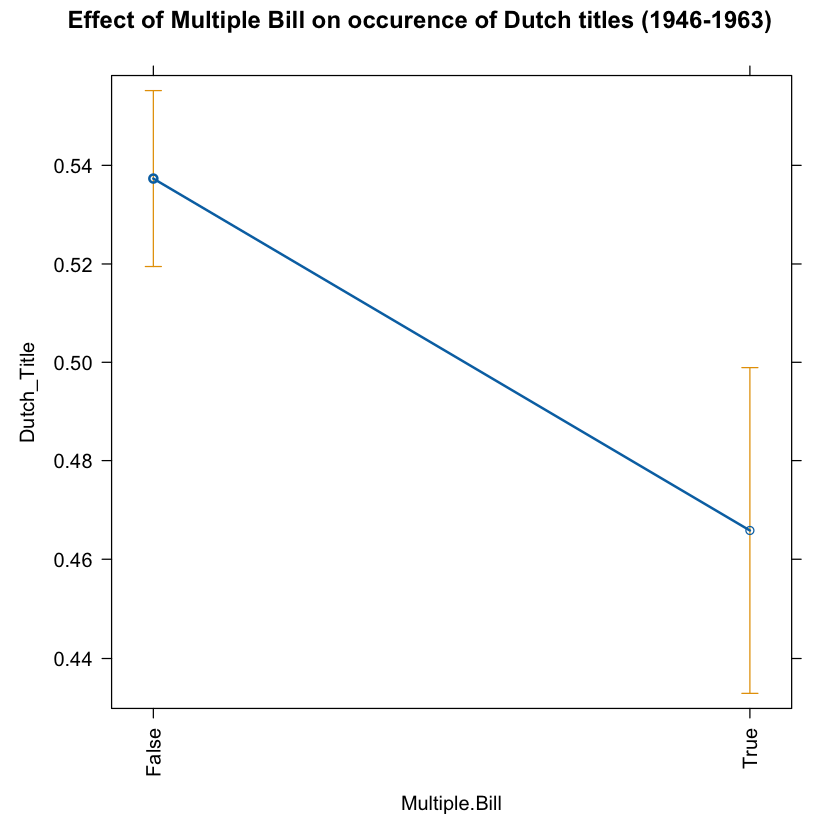

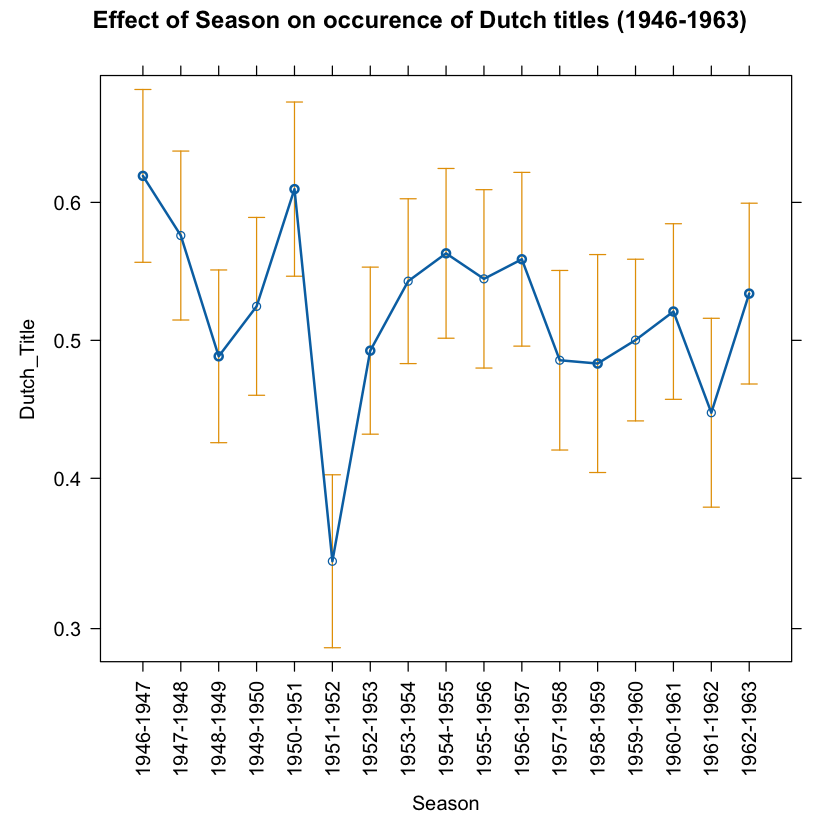

In [26]:
model_NL2 <- glm(Dutch_Title ~ Multiple.Bill + Season, data = df_lang, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of Dutch titles 1946-1963

plot(effect("Multiple.Bill", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of Dutch titles (1946-1963)')

plot(effect("Season", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of Dutch titles (1946-1963)')

In [27]:
# The same for German

m4 <- glm(German_Title ~ Season + Occasion + Multiple.Bill + Directors + Original.Premiere, data = df_lang, family = binomial)
drop1(m4)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


,Df,Deviance,AIC
,<dbl>,<dbl>,<dbl>
<none>,NA,2.340358e-08,204
Season,12,2.340358e-08,180
Occasion,1,2.340358e-08,202
Multiple.Bill,1,2.340358e-08,202
Directors,0,2.340358e-08,204
Original.Premiere,83,2.340358e-08,38


Warning message:
“glm.fit: algorithm did not converge”


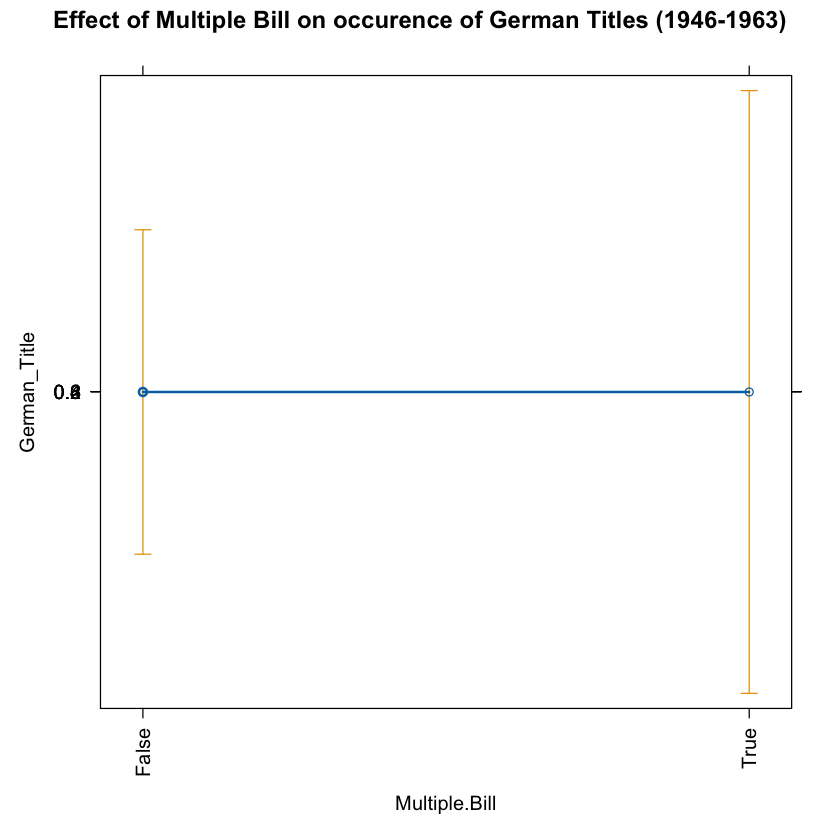

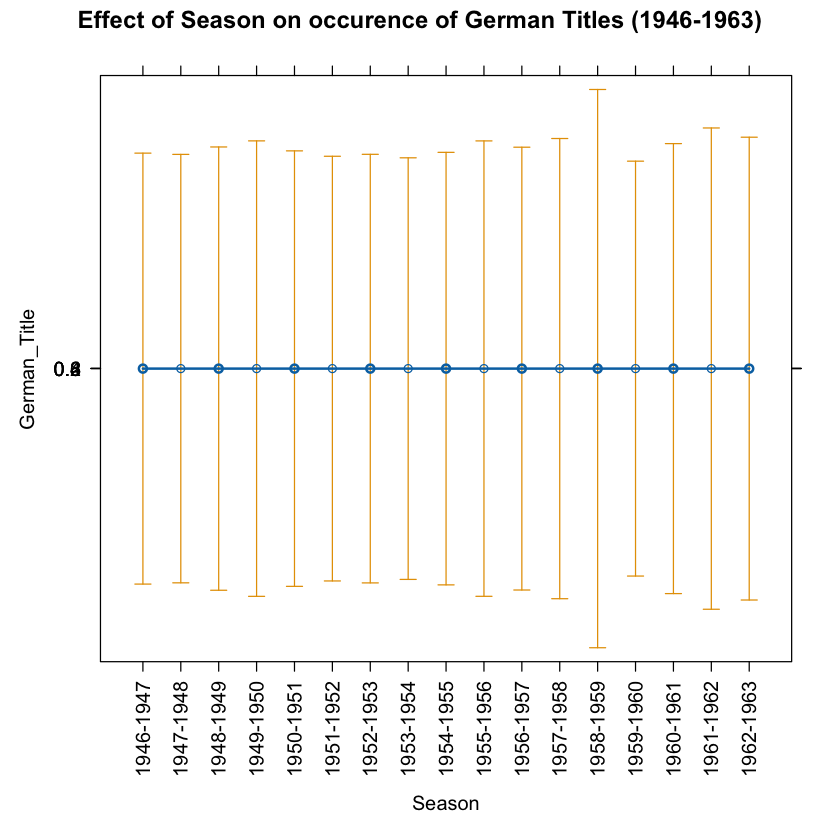

In [28]:
model_GER2 <- glm(German_Title ~ Season + Multiple.Bill, data = df_lang, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of German titles 1946-1963

plot(effect("Multiple.Bill", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple Bill on occurence of German Titles (1946-1963)')

plot(effect("Season", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German Titles (1946-1963)')